In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [2]:
dados = pd.read_csv('aluguel_2.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [3]:
#Create grid to build 4 plots
area = plt.figure() 

<Figure size 1080x576 with 0 Axes>

In [4]:
g1 = area.add_subplot(2, 2, 1) #2 rows, 2 columns, position 1
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [5]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0]) #recreate index
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

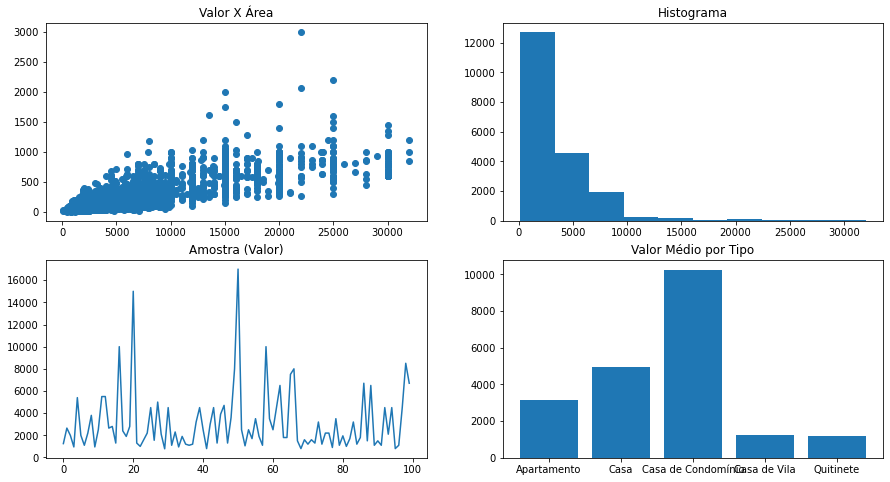

In [6]:
area

In [7]:
# Save image
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')

#bbox_inches = retirar o excesso de borda branca

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 7))

dados = pd.read_csv('aluguel_amostra.csv', sep = ';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

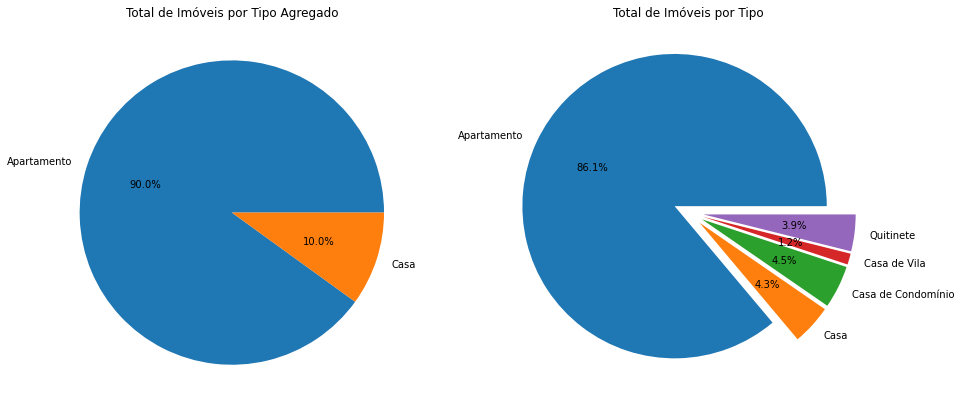

In [10]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')